In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

In [3]:
courses = pd.read_csv('/Users/hoanh/Desktop/Portfolio/Udemy_project/Udemy_course/Course_info.csv')

In [4]:
comments = pd.read_csv('/Users/hoanh/Desktop/Portfolio/Udemy_project/Udemy_course/Comments.csv')

In [5]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  209734 non-null  float64
 1   title               209734 non-null  object 
 2   is_paid             209734 non-null  bool   
 3   price               209734 non-null  float64
 4   headline            209707 non-null  object 
 5   num_subscribers     209734 non-null  float64
 6   avg_rating          209734 non-null  float64
 7   num_reviews         209734 non-null  float64
 8   num_comments        209734 non-null  float64
 9   num_lectures        209734 non-null  float64
 10  content_length_min  209734 non-null  float64
 11  published_time      209734 non-null  object 
 12  last_update_date    209597 non-null  object 
 13  category            209734 non-null  object 
 14  subcategory         209734 non-null  object 
 15  topic               208776 non-nul

In [6]:
# comments.info()

In [7]:
courses.isnull().sum()

id                      0
title                   0
is_paid                 0
price                   0
headline               27
num_subscribers         0
avg_rating              0
num_reviews             0
num_comments            0
num_lectures            0
content_length_min      0
published_time          0
last_update_date      137
category                0
subcategory             0
topic                 958
language                0
course_url              0
instructor_name         5
instructor_url        427
dtype: int64

In [8]:
courses.describe()

,id,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min
count,2.097340e+05,209734.000000,2.097340e+05,209734.000000,209734.000000,209734.000000,209734.000000,209734.000000
mean,3.015403e+06,81.665529,3.096992e+03,3.747179,244.358812,44.874589,36.548395,265.558856
std,1.342558e+06,117.317846,1.558132e+04,1.533711,2458.098276,355.773107,51.871962,454.448676
min,1.769000e+03,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.950734e+06,19.990000,2.600000e+01,3.800000,3.000000,1.000000,11.000000,69.000000
50%,3.292863e+06,34.990000,2.060000e+02,4.333334,17.000000,5.000000,22.000000,133.000000
75%,4.189458e+06,99.990000,1.435000e+03,4.625000,74.000000,18.000000,42.000000,289.000000
max,4.914146e+06,999.990000,1.752364e+06,5.000000,436457.000000,39040.000000,1095.000000,22570.000000


## General information about courses of dataset

##### The first and last of publish date of courses in this dataset

In [9]:
courses['published_time'] = pd.to_datetime(courses['published_time']).dt.tz_localize(None)
courses['last_update_date'] = pd.to_datetime(courses['last_update_date'])
print('The first published date of dataset',courses['published_time'].min().strftime('%m/%d/%Y'))
print('The last published date of dataset',courses['published_time'].max().strftime('%m/%d/%Y'))

The first published date of dataset 01/12/2010
The last published date of dataset 10/05/2022


In [10]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  209734 non-null  float64       
 1   title               209734 non-null  object        
 2   is_paid             209734 non-null  bool          
 3   price               209734 non-null  float64       
 4   headline            209707 non-null  object        
 5   num_subscribers     209734 non-null  float64       
 6   avg_rating          209734 non-null  float64       
 7   num_reviews         209734 non-null  float64       
 8   num_comments        209734 non-null  float64       
 9   num_lectures        209734 non-null  float64       
 10  content_length_min  209734 non-null  float64       
 11  published_time      209734 non-null  datetime64[ns]
 12  last_update_date    209597 non-null  datetime64[ns]
 13  category            209734 no

##### Correlation among variables in dataset

In [11]:
check_corr = courses[['price','num_subscribers','avg_rating','num_reviews','num_comments','num_lectures','content_length_min']]
check_corr.corr()

,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min
price,1.000000,0.017964,0.031457,0.032550,0.039304,0.150983,0.154961
num_subscribers,0.017964,1.000000,0.077144,0.736819,0.730623,0.180190,0.119574
avg_rating,0.031457,0.077144,1.000000,0.048506,0.060731,0.146017,0.108175
num_reviews,0.032550,0.736819,0.048506,1.000000,0.951832,0.186023,0.125941
num_comments,0.039304,0.730623,0.060731,0.951832,1.000000,0.202704,0.137998
num_lectures,0.150983,0.180190,0.146017,0.186023,0.202704,1.000000,0.729714
content_length_min,0.154961,0.119574,0.108175,0.125941,0.137998,0.729714,1.000000


## Find all subcategories by categories

In [12]:
for category in list(courses['category'].unique()):
    print(f'Subcategories of {category} including:')
    for i in list((courses.loc[courses['category']==category])['subcategory'].unique()):
        print(f'  - {i}')

Subcategories of Lifestyle including:
  - Food & Beverage
  - Other Lifestyle
  - Pet Care & Training
  - Arts & Crafts
  - Home Improvement & Gardening
  - Esoteric Practices
  - Beauty & Makeup
  - Travel
  - Gaming
Subcategories of Business including:
  - Entrepreneurship
  - Media
  - Communication
  - Sales
  - Business Analytics & Intelligence
  - Industry
  - Operations
  - Business Strategy
  - Other Business
  - Management
  - Human Resources
  - Project Management
  - Real Estate
  - Business Law
  - E-Commerce
Subcategories of Design including:
  - Web Design
  - Design Tools
  - Graphic Design & Illustration
  - User Experience Design
  - Game Design
  - 3D & Animation
  - Interior Design
  - Other Design
  - Fashion Design
  - Architectural Design
Subcategories of Health & Fitness including:
  - Yoga
  - General Health
  - Dance
  - Meditation
  - Fitness
  - Sports
  - Other Health & Fitness
  - Nutrition & Diet
  - Mental Health
  - Martial Arts & Self Defense
  - Safety

## Number of courses published by year

/var/folders/mf/14nm5d1d2mdch5rkhnqkvxh00000gn/T/ipykernel_14139/1372583407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  course_yr_category['year'] = course_yr_category['published_time'].dt.strftime('%Y')


Text(0, 0.5, '')

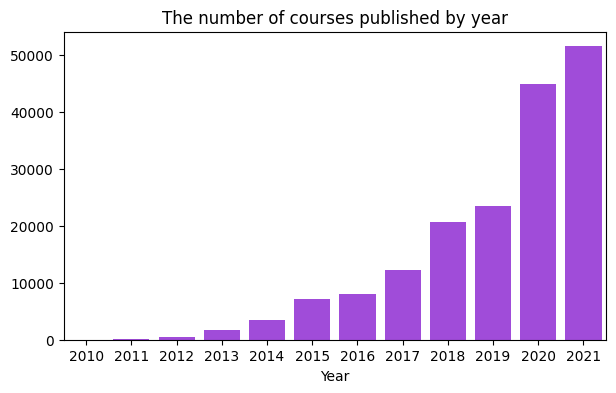

In [13]:
course_yr_category = courses[['id','category','published_time']]
course_yr_category['year'] = course_yr_category['published_time'].dt.strftime('%Y')
course_yr_category_data = course_yr_category.groupby('year',as_index=False)['id'].count()

fig, axe = plt.subplots(figsize=(7,4))
sns.barplot(data=course_yr_category_data[course_yr_category_data['year'] != '2022'], x='year', y='id', color='#A435F0')
plt.title('The number of courses published by year')
plt.xlabel('Year')
plt.ylabel('')

##### The number of publish course throughout the years

/var/folders/mf/14nm5d1d2mdch5rkhnqkvxh00000gn/T/ipykernel_14139/180576857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  publish_data['year'] = courses['published_time'].dt.strftime('%Y')


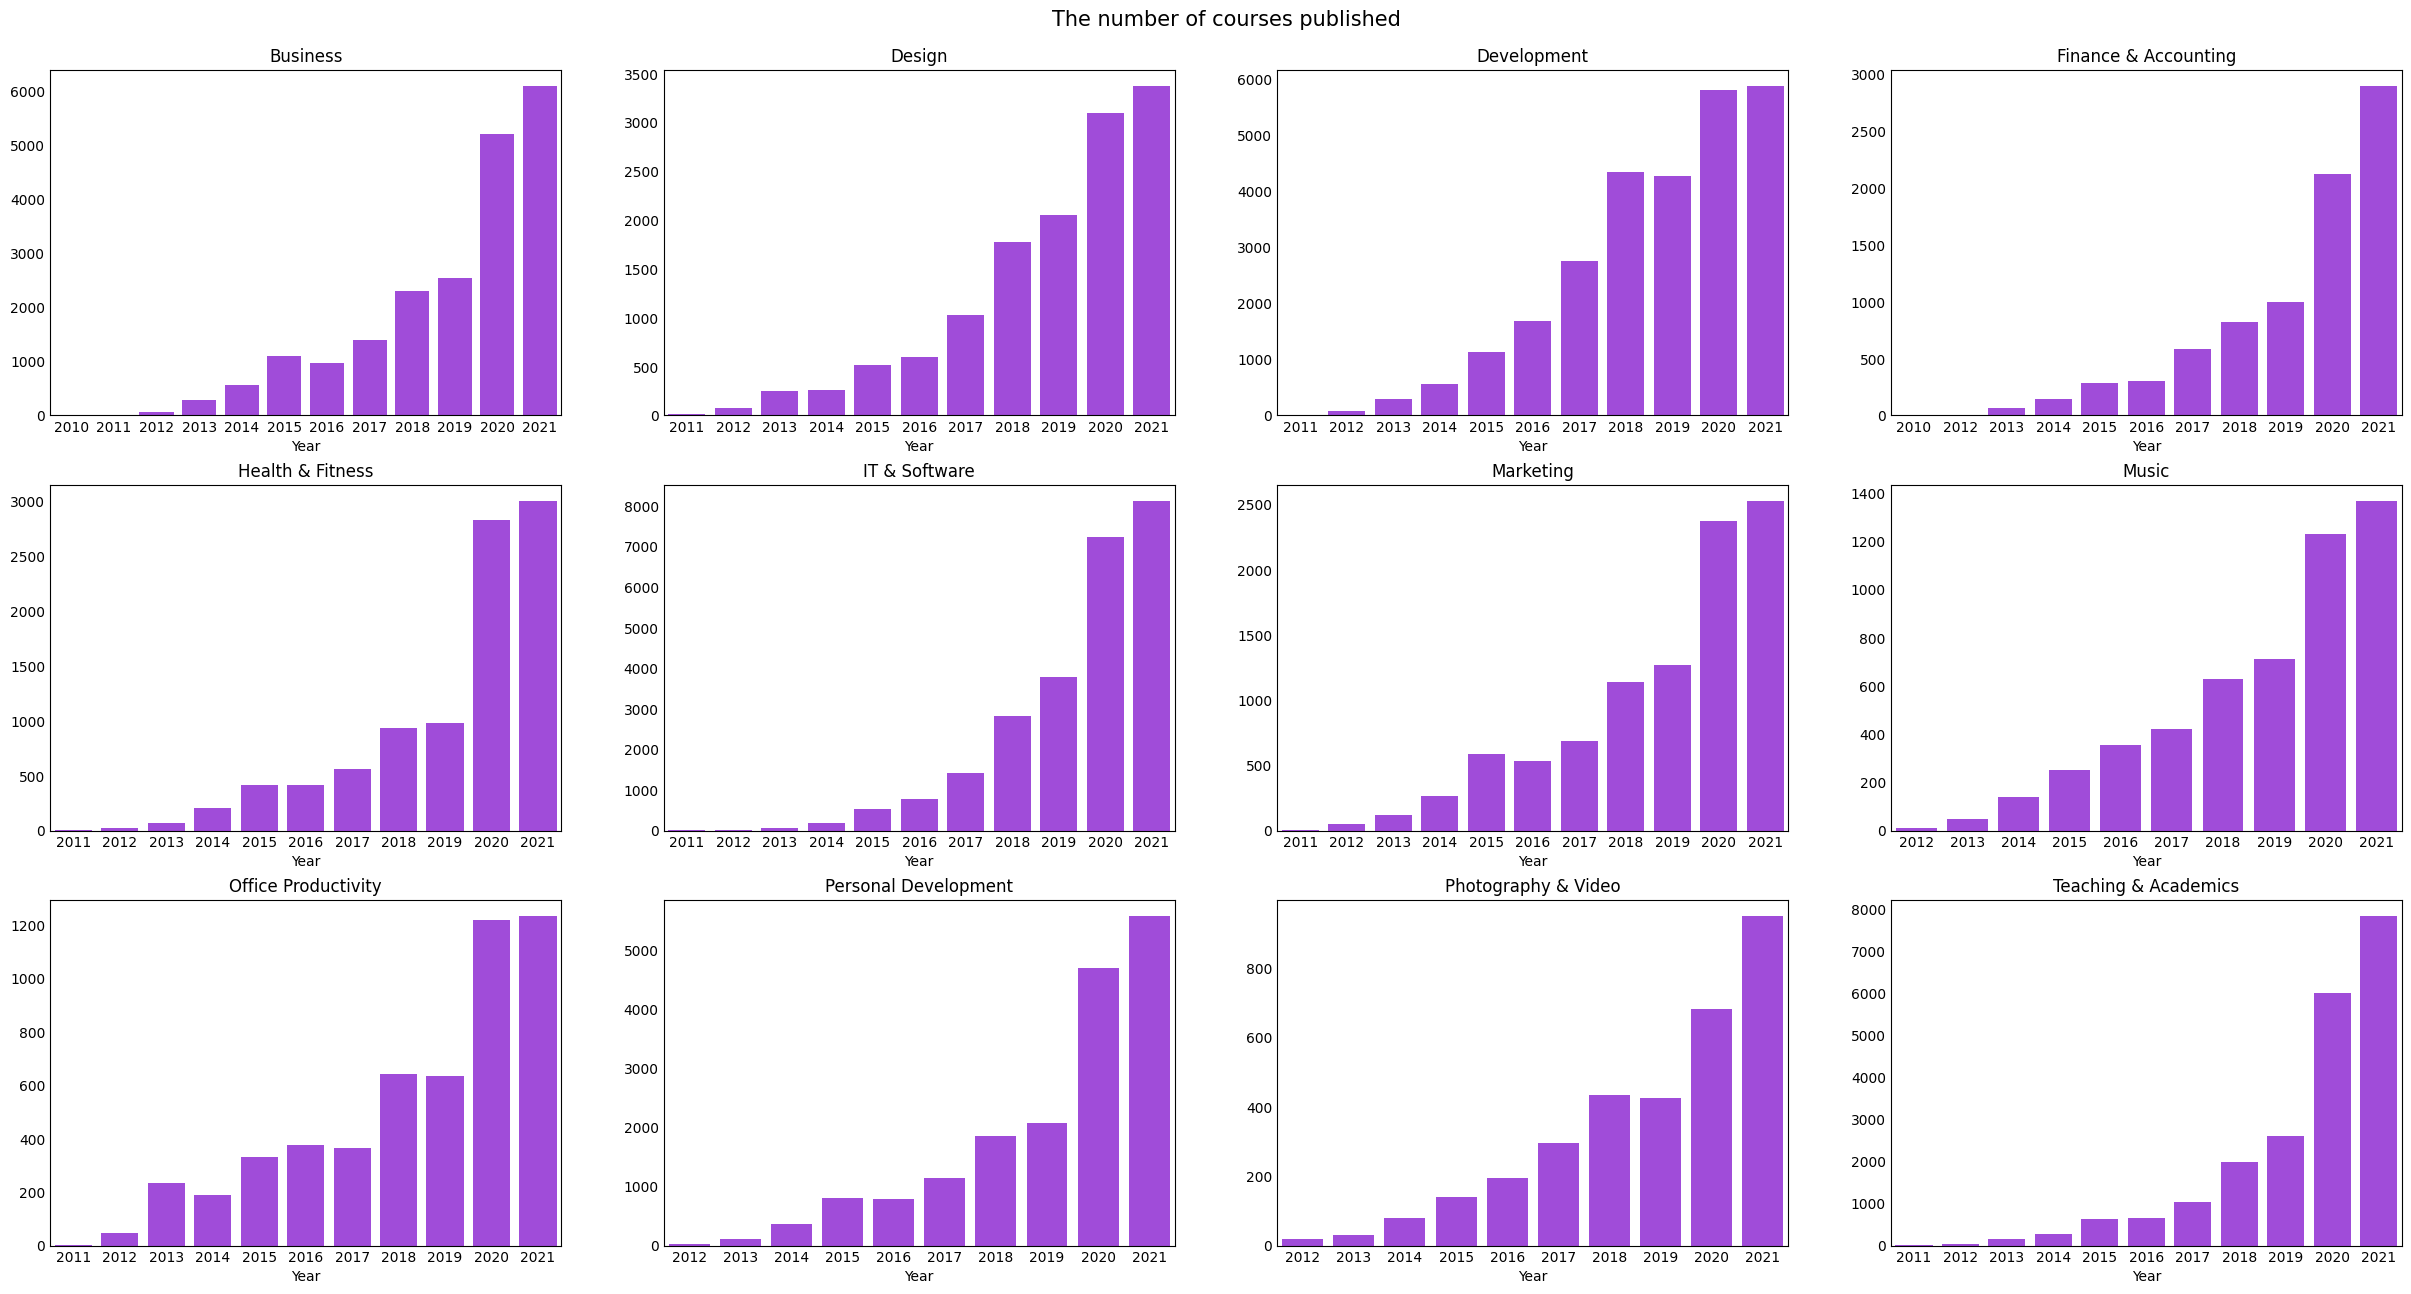

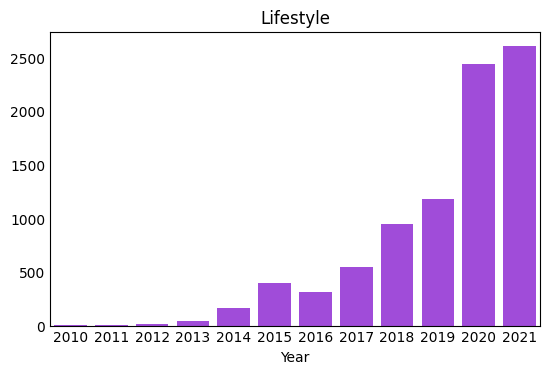

In [107]:
publish_data = courses[['id','category','published_time']]
publish_data['year'] = courses['published_time'].dt.strftime('%Y')
publish_data_graph = publish_data.groupby(['category','year'], as_index=False)['id'].count()
publish_data_graph = publish_data_graph.loc[publish_data_graph['year']!='2022']
publish_data_graph_1 = publish_data_graph[publish_data_graph['category'] != 'Lifestyle']

figure, axes = plt.subplots(3,4, figsize=(24,12))
ax_num_1 = 0
ax_num_2 = 0

plt.suptitle('The number of courses published', fontsize=15, y=1.04)
for category in publish_data_graph_1['category'].unique():
    if ax_num_2 < 4: ax_num_2 = ax_num_2
    elif ax_num_2 == 4:  
        ax_num_1 += 1 
        ax_num_2 = 0 
    sns.barplot(ax= axes[ax_num_1,ax_num_2]
                ,data=publish_data_graph_1[publish_data_graph_1['category']==category]
                ,x='year'
                ,y='id'
                ,color='#A435F0')
    axes[ax_num_1,ax_num_2].set_title(str(category))
    axes[ax_num_1,ax_num_2].set_xlabel('Year')
    axes[ax_num_1,ax_num_2].set_ylabel('')
    ax_num_2 += 1

publish_data_graph_2 = publish_data_graph[publish_data_graph['category'] == 'Lifestyle']
figure, axes = plt.subplots(figsize=(5,3))
sns.barplot(data=publish_data_graph_2, x='year',y='id', color='#A435F0')
plt.title('Lifestyle')
plt.xlabel('Year')
plt.ylabel('')
plt.show()

## Course price Analysis

##### The number of free and non-free courses

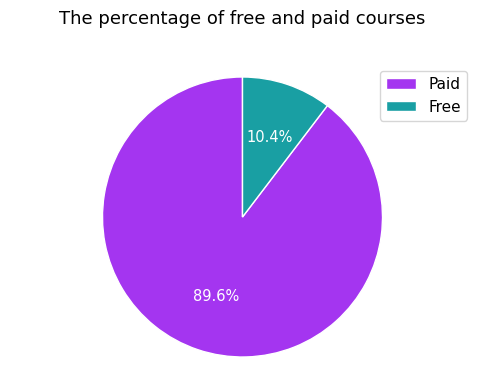

In [15]:
course_type = pd.DataFrame(courses['is_paid'].value_counts()).reset_index()
course_type = course_type.rename(columns={'index':'type','is_paid':'quantity'})
course_type

figure, axe = plt.subplots(figsize=(6,4))
plt.pie(course_type['quantity'], 
        labels=['Paid','Free'],  
        autopct='%.1f%%', 
        startangle= 90,
        colors = ['#A435F0','#199FA3'],
        wedgeprops= {"edgecolor":"white",
                     'linewidth': 1,
                     'antialiased': True},
        textprops=dict(color='w', fontsize=10.5))
axe.legend(['Paid','Free'], fontsize= 11)

plt.title('The percentage of free and paid courses', fontsize=13, y=1.1)
plt.axis('equal')
plt.show()

##### Distribution of course price

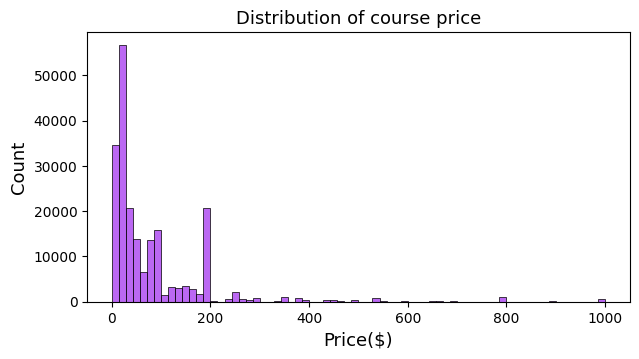

In [16]:
figure, axe = plt.subplots(figsize=(7,3.5))
colors = sns.color_palette('pastel')
plt.style.use('_mpl-gallery-nogrid')
sns.histplot(data=courses, x='price', bins=70, color='#A435F0', discrete=False)
axe.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Price($)', fontdict={'size':13})
plt.ylabel('Count', fontdict={'size':13})
plt.title('Distribution of course price', fontdict={'size':13})
plt.show()

##### The average price of course by field as compared to average price of all courses

##### The average price of course by category

In [17]:
quantity = pd.DataFrame(courses['category'].value_counts()).reset_index().rename(columns={'index':'Field', 'category':'Quantity'})
avg_price = pd.DataFrame(courses.groupby('category', as_index=False)['price'].mean()).rename(columns={'price':'average price'})
price_quantity = quantity.merge(avg_price, left_on='Field' , right_on='category').drop(columns=['category'])
price_quantity['percent'] = round(price_quantity['Quantity']/sum(price_quantity['Quantity'])*100,1)
price_quantity

,Field,Quantity,average price,percent
0,Development,31643,93.946847,15.1
1,IT & Software,30479,75.825049,14.5
2,Teaching & Academics,26293,76.358691,12.5
3,Business,24670,85.346927,11.8
4,Personal Development,21239,81.022485,10.1
5,Design,15256,85.054441,7.3
6,Health & Fitness,11568,68.546955,5.5
7,Marketing,11221,83.907674,5.4
8,Lifestyle,10653,71.560340,5.1
9,Finance & Accounting,10572,88.341426,5.0


In [18]:
price_quantity['average price'].mean()

80.625013744223

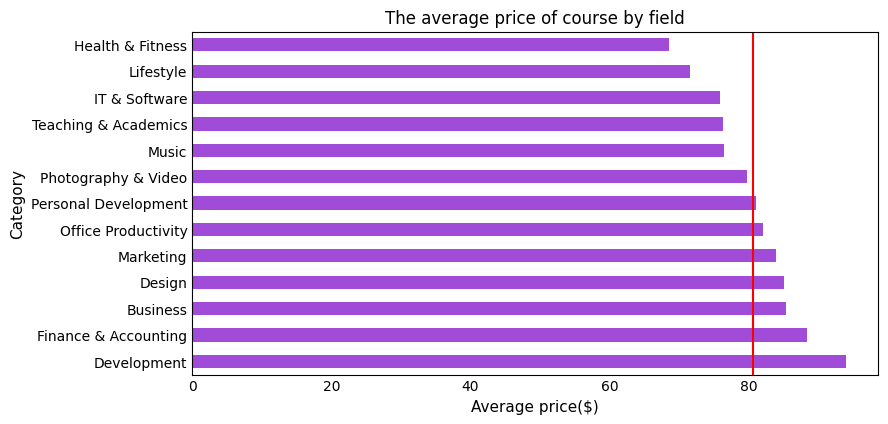

In [19]:
figure, axe = plt.subplots(figsize=(7,3.5))
sns.barplot(data=price_quantity.sort_values('average price'), y='Field', x='average price', color='#A435F0', width=0.5)
plt.style.use('_mpl-gallery-nogrid')
plt.axvline(x=price_quantity['average price'].mean(), color='r')
plt.title('The average price of course by field')
plt.xlabel('Average price($)', fontdict={'size':11})
plt.ylabel('Category', fontdict={'size':11})
plt.show()

##### Top courses having the highest price

In [20]:
courses[courses['price']==999.99][['title']]

,title
69,"Oracle Veritabanı Programlama : SQL, PL/SQL, O..."
26590,React Native ile iOS ve Android Uygulama Geliş...
26599,Sıfırdan Wordpress Tema Yapımı
27917,Go Programlama Dili
28029,"SQL Server Veritabanı Programlama: Temel, Orta..."
...,...
196148,كورس معادلة هندسة
199006,كورس كيف تكتب رواية ـ ورشة كتابة الرواية ـ الم...
202947,Advance Your Pharmacy Career (Arabic)
203920,Biostatistics For Healthcare Professionals


##### The average price of courses throughout the years

/var/folders/mf/14nm5d1d2mdch5rkhnqkvxh00000gn/T/ipykernel_14139/1362291693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_yrs['year'] = price_yrs['published_time'].dt.strftime('%Y')


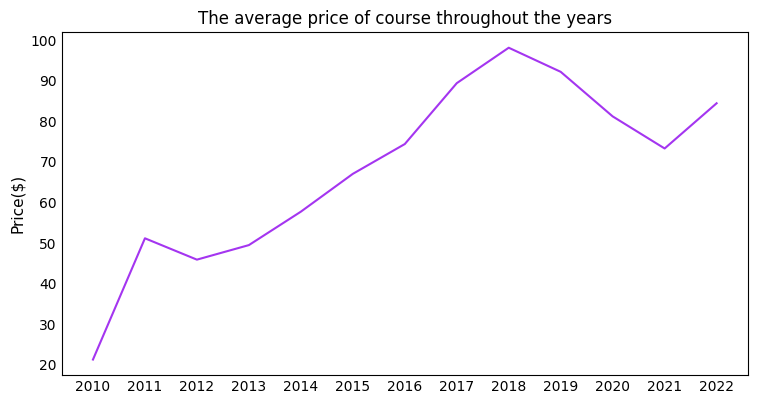

In [21]:
price_yrs = courses[['id','category','price','published_time']]
price_yrs['year'] = price_yrs['published_time'].dt.strftime('%Y')
price_yrs_graph = price_yrs.groupby(['year'], as_index=False)['price'].mean()

figure, axe = plt.subplots(figsize=(7,3.5))
sns.lineplot(data=price_yrs_graph, x='year', y='price' ,color='#A435F0')
plt.style.use('_mpl-gallery-nogrid')
plt.title('The average price of course throughout the years')
plt.xlabel('', fontdict={'size':11})
plt.ylabel('Price($)', fontdict={'size':11})
plt.show()

/var/folders/mf/14nm5d1d2mdch5rkhnqkvxh00000gn/T/ipykernel_14139/3206083631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue['gr_sale'] = revenue['price'] * revenue['num_subscribers']


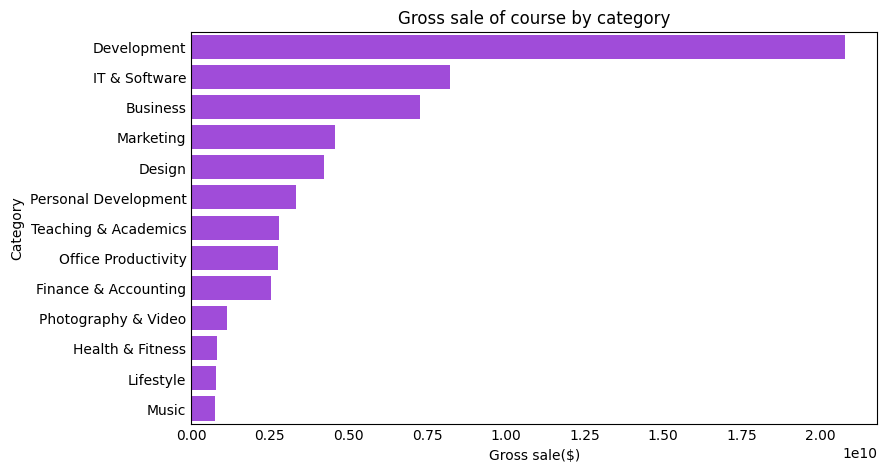

In [22]:
revenue = courses[['id','category','price','num_subscribers']]
revenue['gr_sale'] = revenue['price'] * revenue['num_subscribers']
revenue_graph = revenue.groupby('category', as_index=False)['gr_sale'].sum()

### Draw graph
fig, axe = plt.subplots(figsize=(7,4))
sns.barplot(data=revenue_graph.sort_values('gr_sale', ascending=False), x='gr_sale', y='category', color='#A435F0')
plt.title('Gross sale of course by category')
plt.ylabel('Category')
plt.xlabel('Gross sale($)')
plt.show()

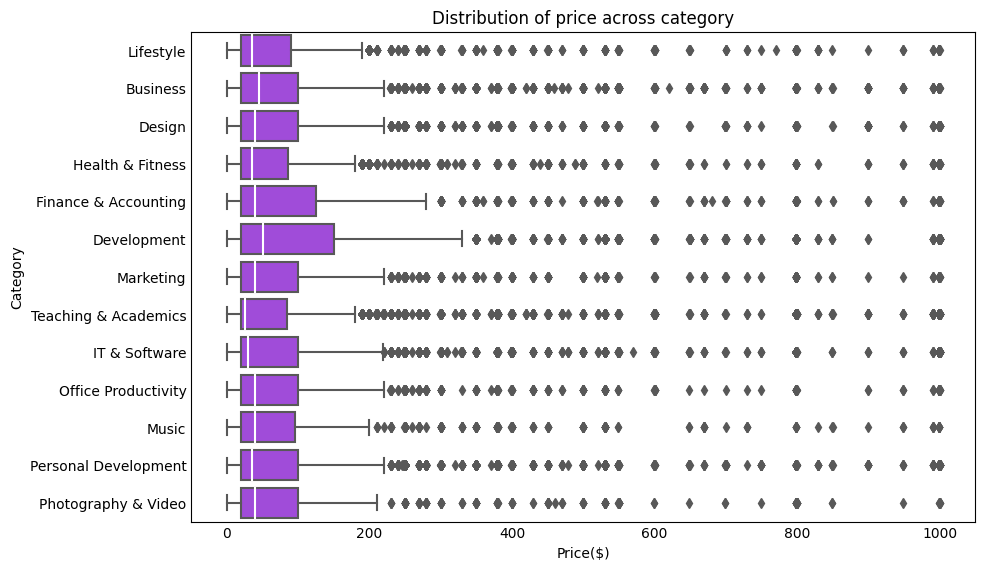

In [23]:
# Box plot showing the distribution of price across category
plt.figure(figsize=(8,5), dpi=100)
sns.boxplot(data=courses, x='price', y='category', color='#A435F0'
            ,medianprops=dict(color="w"))
plt.title('Distribution of price across category')
plt.xlabel('Price($)')
plt.ylabel('Category')
plt.show()

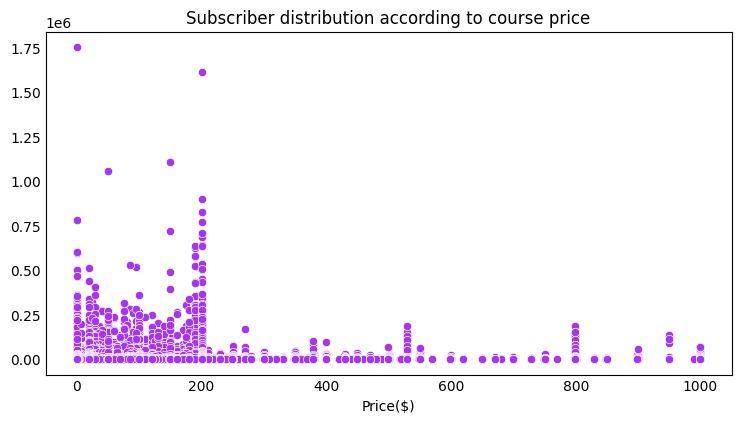

In [24]:
fig, axes = plt.subplots(figsize=(7,3.5))
sns.scatterplot(data=courses, y='num_subscribers', x='price', color='#A435F0')
plt.title('Subscriber distribution according to course price')
plt.xlabel('Price($)')
plt.ylabel('')
plt.show()

In [25]:
revenue_by_subcate = courses[['id','price','num_subscribers','category','subcategory']]
revenue_by_subcate['revenue'] = revenue_by_subcate['price'] * revenue_by_subcate['num_subscribers']
revenue_by_subcate_graph = revenue_by_subcate.groupby(['category','subcategory'], as_index=False)['revenue'].sum()

/var/folders/mf/14nm5d1d2mdch5rkhnqkvxh00000gn/T/ipykernel_14139/1455934835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_by_subcate['revenue'] = revenue_by_subcate['price'] * revenue_by_subcate['num_subscribers']


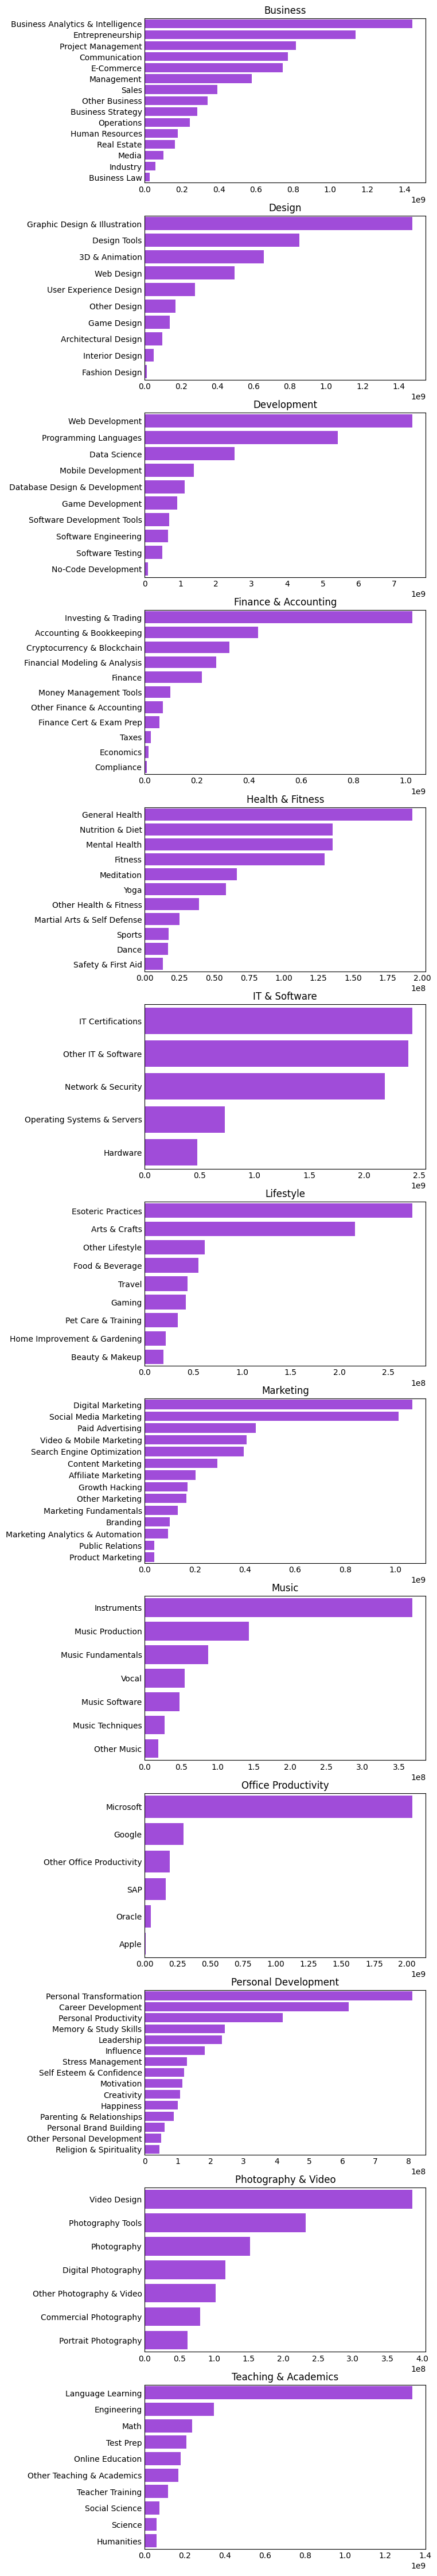

In [26]:
fig, axes = plt.subplots(13, figsize=(5,45))
x = 0
for category in revenue_by_subcate_graph['category'].unique():
    sns.barplot(data=revenue_by_subcate_graph.loc[revenue_by_subcate_graph['category']==category].sort_values('revenue', ascending= False)
                ,y='subcategory'
                ,x='revenue'
                ,ax=axes[x]
                ,color='#A435F0')
    axes[x].set_xlabel('')
    axes[x].set_ylabel('')
    axes[x].set_title(str(category))
    x +=1
plt.show()

## Find the number of languages which were used in Udemy course (in this dataset)

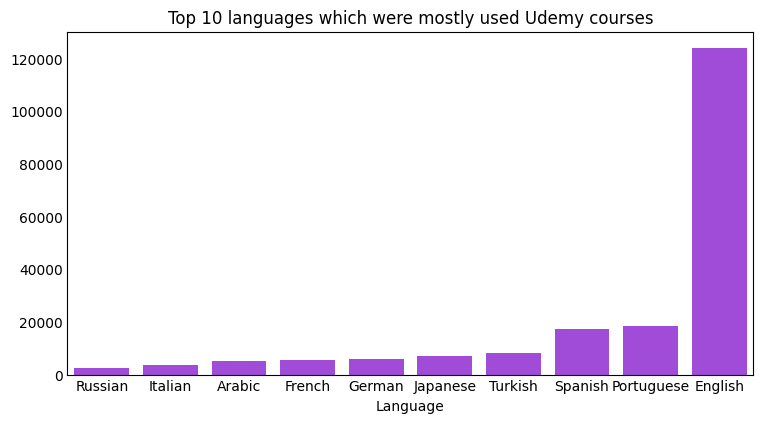

In [27]:
top_language = courses.groupby('language', as_index=False)['id'].count().rename(columns={'id':'quantity'}).sort_values('quantity', ascending=False).head(10)
top_language = top_language.sort_values('language')
figure, axe = plt.subplots(figsize=(7,3.5))
sns.barplot(data=top_language.sort_values('quantity'), x='language', y='quantity', color='#A435F0', width=0.8)
plt.title('Top 10 languages which were mostly used Udemy courses')
plt.xlabel('Language')
plt.ylabel('')
plt.show()

## Subscribers analysis

##### Number of subscribers by 'is_paid"

In [28]:
courses.groupby('is_paid', as_index=False)['num_subscribers'].count()

,is_paid,num_subscribers
0,False,21738
1,True,187996


##### Number of subscribers by category

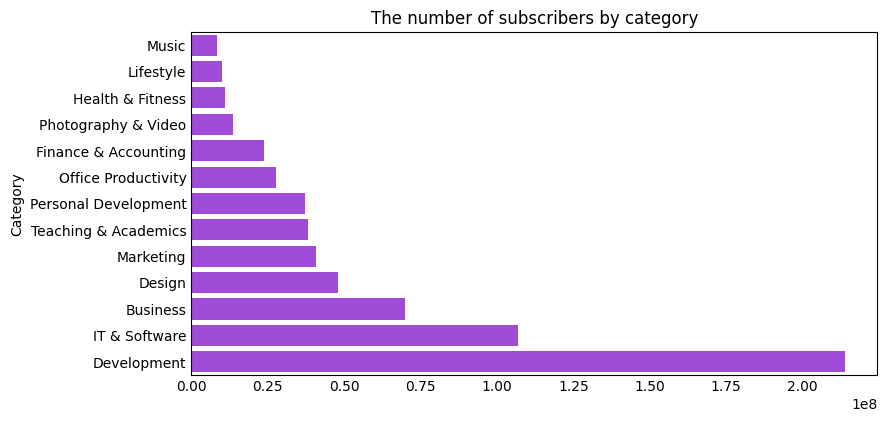

In [29]:
sub_category = courses.groupby('category', as_index=False)['num_subscribers'].sum()
fig, axe = plt.subplots(figsize=(7,3.5))
sns.barplot(data=sub_category.sort_values('num_subscribers'), y='category', x='num_subscribers', color='#A435F0')
plt.title('The number of subscribers by category')
plt.ylabel('Category')
plt.xlabel('')
plt.show()

In [30]:
top_topic = pd.DataFrame(columns=['topic','num_subscribers'])
for category in courses['category'].unique():
    x = courses.loc[courses['category']==category].groupby(['category','topic'], as_index=False)['num_subscribers'].sum().sort_values('num_subscribers', ascending=False)
    top_topic = pd.concat([top_topic,x[0:1]])
top_topic

,topic,num_subscribers,category
187,Drawing,1101459.0,Lifestyle
824,Microsoft Power BI,2061858.0,Business
518,Photoshop,7456781.0,Design
525,Yoga,743731.0,Health & Fitness
377,Stock Trading,2218830.0,Finance & Accounting
989,Python,27489974.0,Development
145,Digital Marketing,4573227.0,Marketing
477,English Language,4839881.0,Teaching & Academics
668,Ethical Hacking,8233643.0,IT & Software
130,Excel,11373371.0,Office Productivity


##### The number of subcribers of each category throughout the years

## Course content length (minutes)

In [31]:
courses['content_length_min'].describe()

count    209734.000000
mean        265.558856
std         454.448676
min           0.000000
25%          69.000000
50%         133.000000
75%         289.000000
max       22570.000000
Name: content_length_min, dtype: float64

In [32]:
a = courses[courses['content_length_min']==0].shape[0]
print(f'There were {a} courses which had the length of content (minutes) equal to 0')

There were 9373 courses which had the length of content (minutes) equal to 0


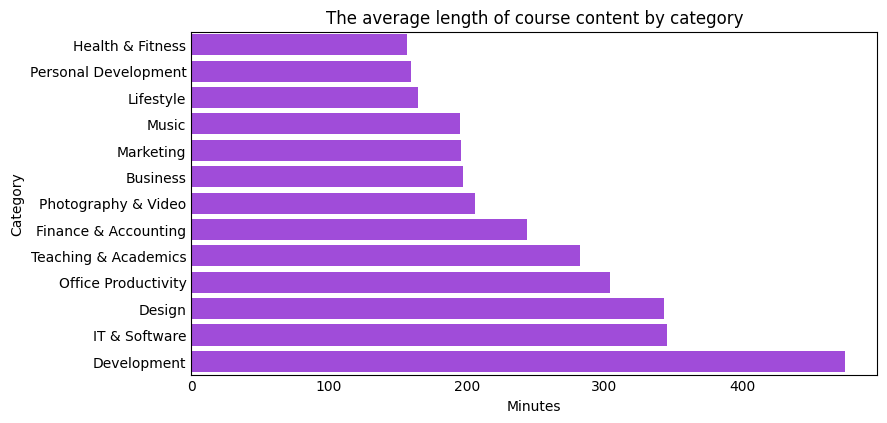

In [33]:
course_length_content = courses[courses['content_length_min']!=0].groupby('category', as_index=False)['content_length_min'].mean()
fig, axe = plt.subplots(figsize=(7,3.5))
sns.barplot(data=course_length_content.sort_values('content_length_min'), y='category', x='content_length_min', color='#A435F0')
plt.title('The average length of course content by category')
plt.xlabel('Minutes')
plt.ylabel('Category')
plt.show()

## Average rating

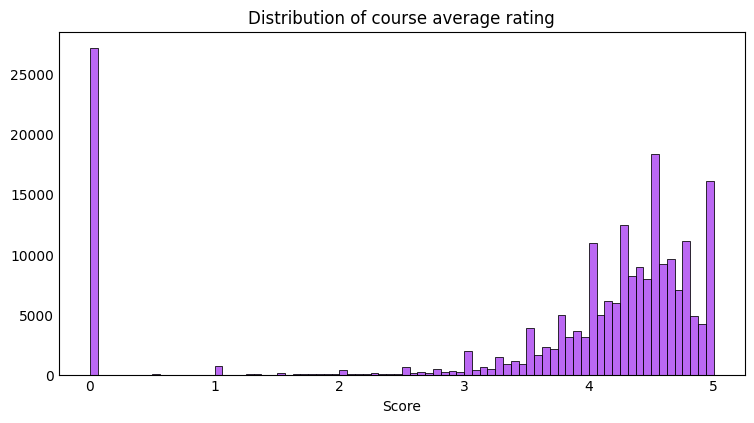

In [34]:
fig, axe = plt.subplots(figsize=(7,3.5))
sns.histplot(data=courses, x='avg_rating', color='#A435F0', bins=80)
plt.title('Distribution of course average rating')
plt.xlabel('Score')
plt.ylabel('')
plt.show()

##### The number of courses which had the avg_raign below 1

In [35]:
courses[courses['avg_rating']<1].groupby('category', as_index=False)['id'].count().sort_values('id')

,category,id
11,Photography & Video,435
9,Office Productivity,588
8,Music,765
7,Marketing,1310
3,Finance & Accounting,1532
1,Design,1588
6,Lifestyle,1747
2,Development,1959
4,Health & Fitness,2206
0,Business,2711


## The average time from published date to last update date of courses by caterogry

In [36]:
update_lag = courses[['category','published_time','last_update_date']].dropna(subset=['last_update_date'])
update_lag['diff_update_date'] = update_lag['last_update_date'] - update_lag['published_time']
update_lag_data = update_lag.groupby('category', as_index=False)['diff_update_date'].mean()
update_lag_data['diff_update_date'] = update_lag_data['diff_update_date'].dt.days.astype('int16')
print('The average time from publish date to last update date of Udemy courses', update_lag_data['diff_update_date'].mean().round(1),'days')

The average time from publish date to last update date of Udemy courses 263.3 days


Text(0, 0.5, 'Category')

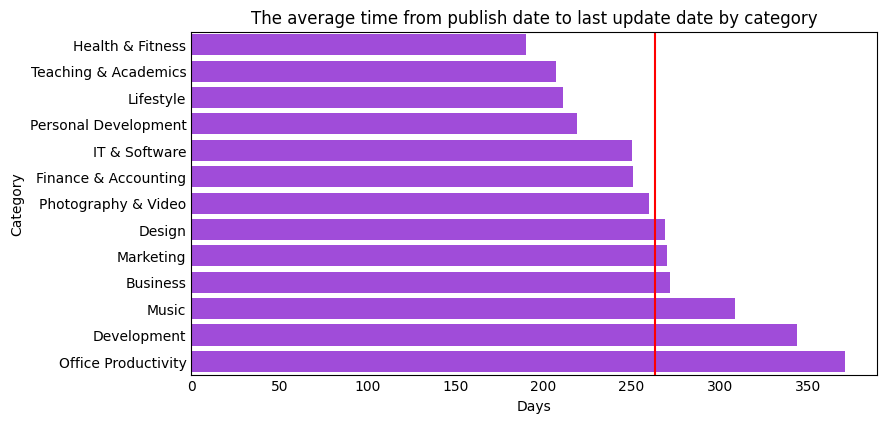

In [37]:
fig, axe = plt.subplots(figsize=(7,3.5))
sns.barplot(data=update_lag_data.sort_values('diff_update_date'), y='category', x='diff_update_date',color='#A435F0')
plt.axvline(x=update_lag_data['diff_update_date'].mean(), color='r')
plt.title('The average time from publish date to last update date by category')
plt.xlabel('Days')
plt.ylabel('Category')

## Reviews and Comments

##### Top 10 courses recived the highest number of reviews and comments

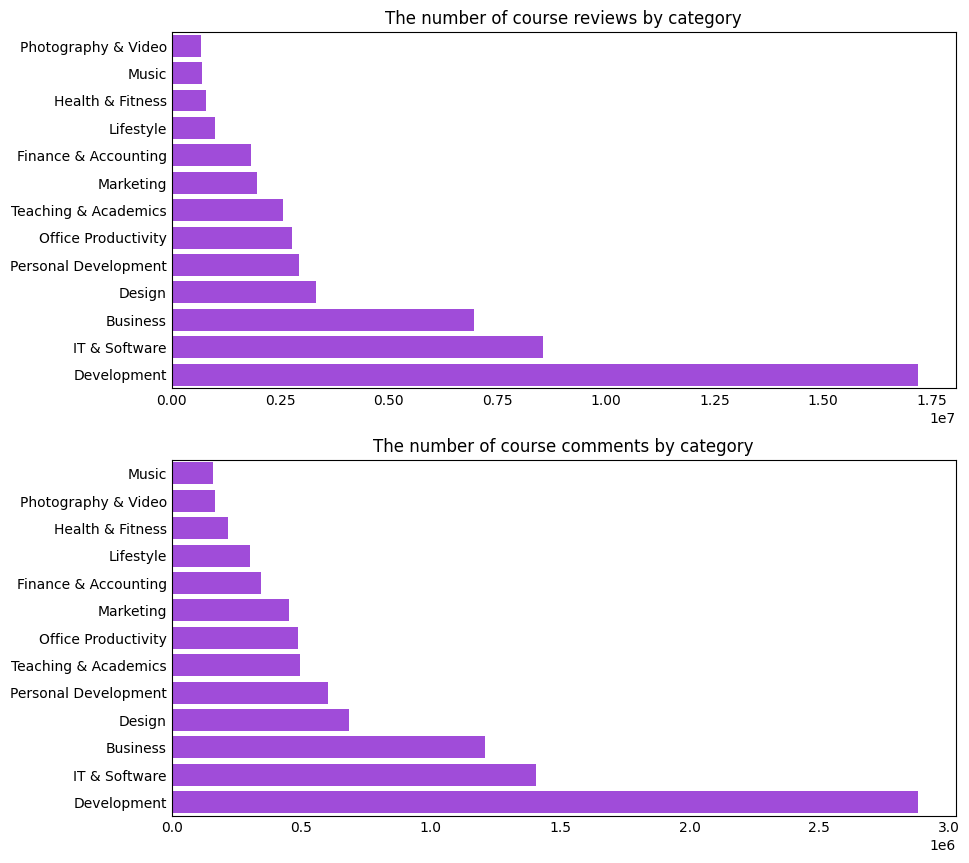

In [38]:
rv_cmt_data = courses.groupby('category', as_index=False)[['num_reviews', 'num_comments']].sum()

fig, axe = plt.subplots(2,1, figsize=(8,8))
sns.barplot(data=rv_cmt_data.sort_values('num_reviews'), y='category', x='num_reviews', color='#A435F0', ax=axe[0])
axe[0].set_xlabel('')
axe[0].set_ylabel('')
axe[0].set_title('The number of course reviews by category')

sns.barplot(data=rv_cmt_data.sort_values('num_comments'), y='category', x='num_comments', color='#A435F0', ax=axe[1])
axe[1].set_title('The number of course comments by category')
axe[1].set_ylabel('')
axe[1].set_xlabel('')
plt.show()

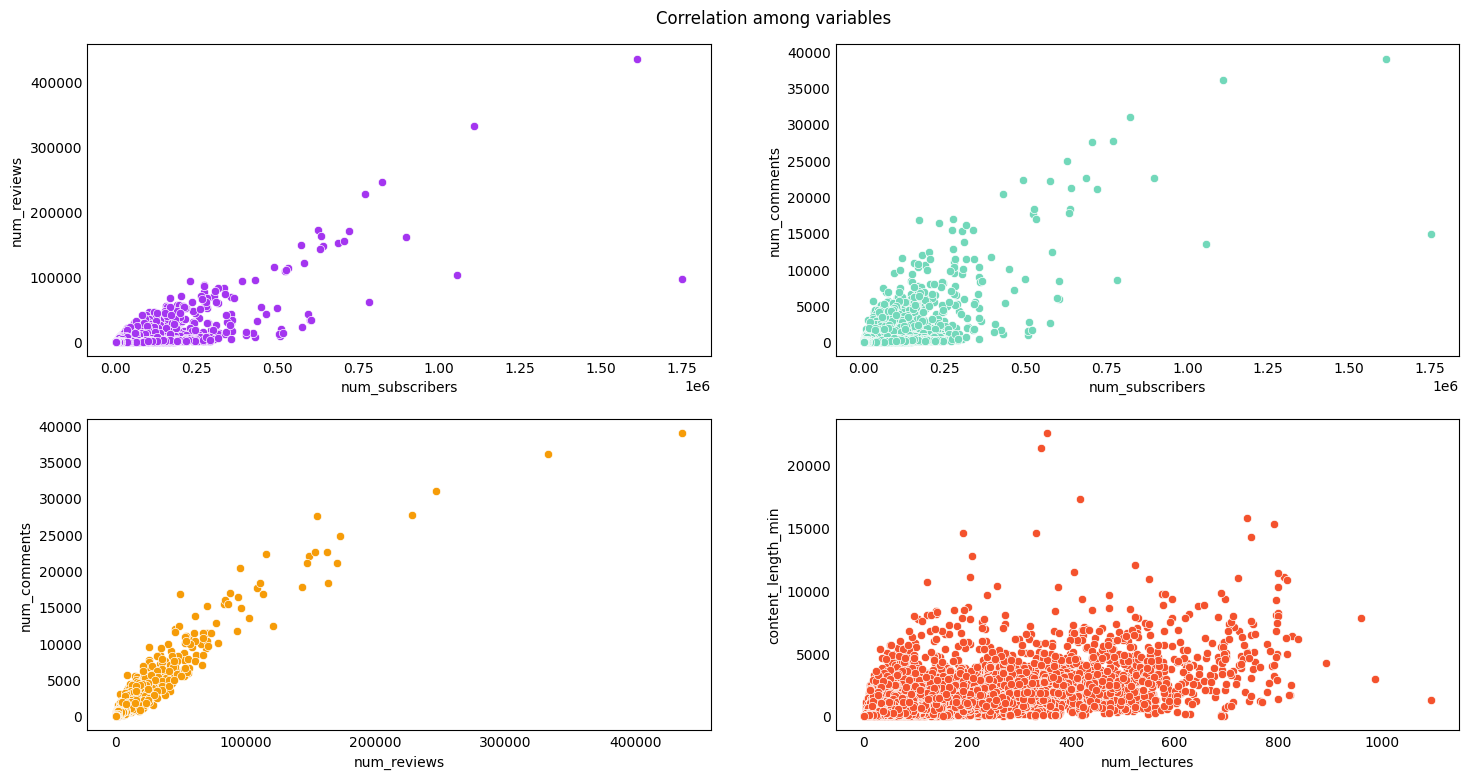

In [39]:
##### Correlation graphs (corralation > 0.7)
### num_subscribers + num_reviews
### num_subscribers + num_comments
### num_reviews + num_comments
### num_lectures + content_length_min
correlation_data = courses[['num_subscribers','num_reviews','num_comments','content_length_min','num_lectures']]
correlation_data
fig, axes = plt.subplots(2,2, figsize=(14,7))
sns.scatterplot(ax=axes[0,0], data=correlation_data, x='num_subscribers', y='num_reviews', color='#A435F0')
sns.scatterplot(ax=axes[0,1], data=correlation_data, x='num_subscribers', y='num_comments', color='#72D8BA')
sns.scatterplot(ax=axes[1,0], data=correlation_data, x='num_reviews', y='num_comments', color='#F69C08')
sns.scatterplot(ax=axes[1,1], data=correlation_data, x='num_lectures', y='content_length_min', color='#F4522D')
plt.suptitle('Correlation among variables', y=1.04)
plt.show()

## Comments analysis

In [40]:
comments['review'] = pd.cut(comments['rate']  
                            ,bins=[0,2.5,3.0,5.0]
                            ,labels=['Negative','Netural','Positive'])
comments.head()

,id,course_id,rate,date,display_name,comment,review
0,88962892,3173036,1.0,2021-06-29T18:54:25-07:00,Rahul,I think a beginner needs more than you think.\...,Negative
1,125535470,4913148,5.0,2022-10-07T11:17:41-07:00,Marlo,Aviva is such a natural teacher and healer/hea...,Positive
2,68767147,3178386,3.5,2020-10-19T06:35:37-07:00,Yamila Andrea,Muy buena la introducción para entender la bas...,Positive
3,125029758,3175814,5.0,2022-09-30T21:13:49-07:00,Jacqueline,This course is the best on Udemy. This breakd...,Positive
4,76584052,3174896,4.5,2021-01-30T08:45:11-08:00,Anthony,I found this course very helpful. It was full ...,Positive


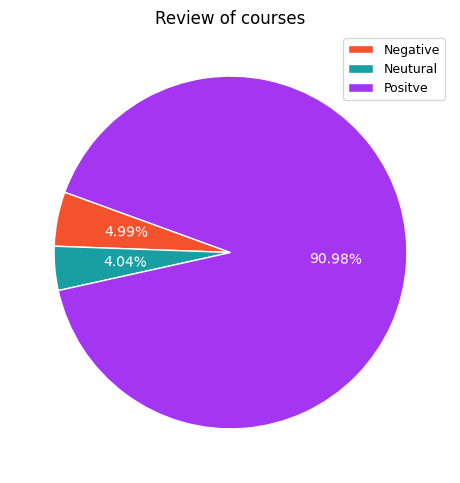

In [41]:
review_graph = comments.groupby('review', as_index=False)['id'].count()
fig, axe = plt.subplots(figsize=(4.5,4.5))
plt.pie(review_graph['id'], 
        autopct='%.2f%%', 
        startangle= 160,
        colors = ['#F4522D','#199FA3','#A435F0'],
        wedgeprops= {"edgecolor":"white",
                     'linewidth': 1,
                     'antialiased': True},
        textprops=dict(color='white', fontsize=10, rotation=-1))
plt.title('Review of courses')

axe.legend(['Negative','Neutural','Positve'], fontsize=9)
plt.show()

##### Review by category

In [42]:
rv_category = comments[['course_id','review']].merge(courses[['id','category','subcategory']], how='left', left_on='course_id', right_on='id')

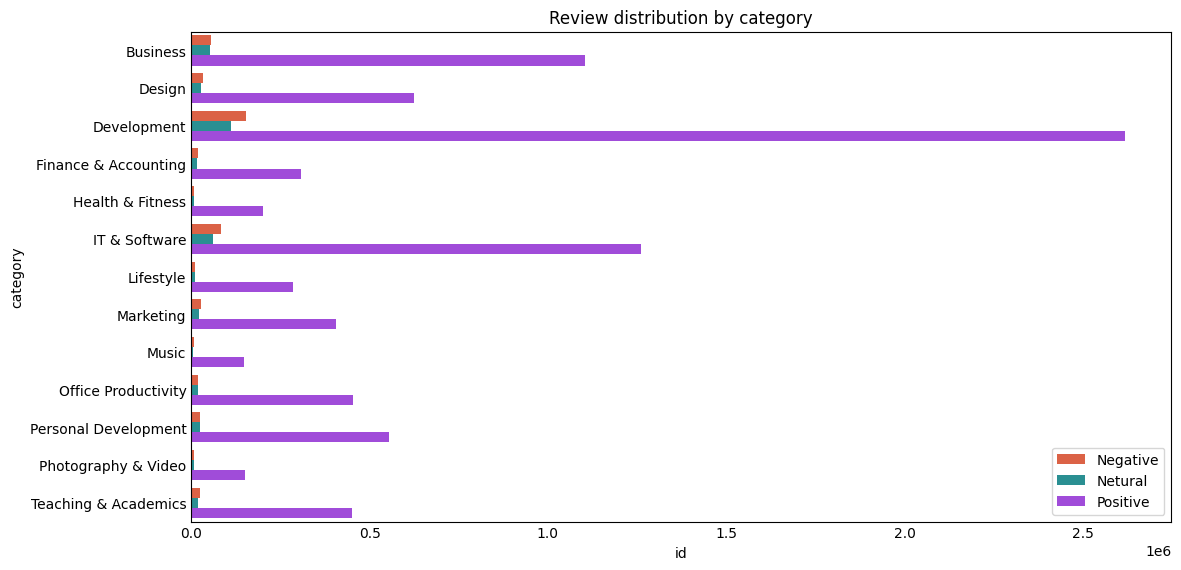

In [43]:
rv_category_graph = rv_category.groupby(['category','review'], as_index=False)['id'].count()
fig, axe = plt.subplots(figsize=(10,5))
sns.barplot(data=rv_category_graph, y='category', x='id', hue='review', palette=['#F4522D','#199FA3','#A435F0'])
plt.title('Review distribution by category')
plt.legend(loc='lower right')
plt.show()

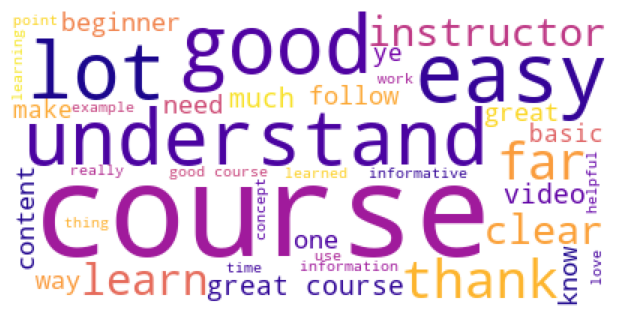

In [106]:
comment = ''
stopwords = set(STOPWORDS)

for val in comments['comment'].sample(500000, random_state=16):
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment += " ".join(tokens)+" " 

wordcloud = WordCloud(background_color ='white',
                colormap='plasma',
                stopwords = stopwords,
                min_font_size = 10).generate(comment)

plt.figure(figsize = (6,4), facecolor=None, dpi=100)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()